### Student Information
Name: 金藜軒

Student ID: 109065701

GitHub ID: alalachin

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [69]:
### Begin Assignment Here

import pandas as pd
import helpers_2.data_mining_helpers as dmh_2


def format_labels(target, docs):
    """ format the labels """
    categories = ['positive', 'negative']
    return categories[ta]

df_amazon = pd.read_table('sentiment_labelled_sentences/amazon_cells_labelled.txt',header=None)
df_imdb = pd.read_table('sentiment_labelled_sentences/imdb_labelled.txt',header=None)
df_yelp = pd.read_table('sentiment_labelled_sentences/yelp_labelled.txt',header=None)

df_amazon.rename(columns = {0:'sentence', 1:'label'}, inplace = True)
df_imdb.rename(columns = {0:'sentence', 1:'label'}, inplace = True)
df_yelp.rename(columns = {0:'sentence', 1:'label'}, inplace = True)

categories = ['negative', 'positive']
df_amazon['category_name'] = df_amazon.label.apply(lambda t: categories[t])
df_imdb['category_name'] = df_imdb.label.apply(lambda t: categories[t])
df_yelp['category_name'] = df_yelp.label.apply(lambda t: categories[t])

In [70]:
df_amazon

,sentence,label,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
995,The screen does get smudged easily because it ...,0,negative
996,What a piece of junk.. I lose more calls on th...,0,negative
997,Item Does Not Match Picture.,0,negative
998,The only thing that disappoint me is the infra...,0,negative


# Using new dataset to repete exercises
I choose amazon.

## Excersice_1
In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [72]:
print (df_amazon.sentence[:3])

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
Name: sentence, dtype: object


## Excersice_2
Experiment with other querying techniques using pandas dataframes

In [73]:
df_amazon.loc[: ,lambda df: ["sentence", "label"]][:5]

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Excersice_3
Try to fecth records belonging to the "0" category, and query every 10th record. Only show the first 5 records.

In [74]:
df_amazon.loc[lambda df: df_amazon["category_name"]=="negative"][::10][:5]

,sentence,label,category_name
0,So there is no way for me to plug it in here i...,0,negative
20,I went on Motorola's website and followed all ...,0,negative
37,Poor Talk Time Performance.,0,negative
60,Essentially you can forget Microsoft's tech su...,0,negative
83,The battery runs down quickly.,0,negative


## Excersice_4
Try to calculate the missing values in every record instead of every column.

In [75]:
df_amazon.isnull().apply(lambda x: dmh_2.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

## Excersice_5
(?)

## Excersice_6
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [81]:
print ("Sampling doesn't change the original dataset")
df_amazon_sample = df_amazon.sample(n=500) #random state
df_amazon

Sampling doesn't change the original dataset


,sentence,label,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
995,The screen does get smudged easily because it ...,0,negative
996,What a piece of junk.. I lose more calls on th...,0,negative
997,Item Does Not Match Picture.,0,negative
998,The only thing that disappoint me is the infra...,0,negative


## Excersice_7
Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

negative    255
positive    245
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

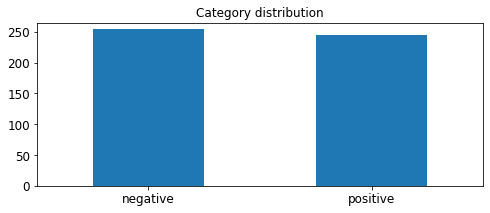

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(df_amazon_sample.category_name.value_counts()) + 10
print (df_amazon_sample.category_name.value_counts())

# plot barchart for X_sample
df_amazon_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## Excersice_8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

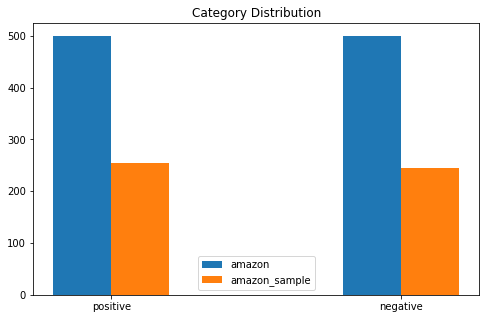

In [84]:
import numpy as np

N=2
blue_bar = df_amazon.category_name.value_counts()
orange_bar = df_amazon_sample.category_name.value_counts()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(8,5))

# Width of a bar 
width = 0.2

# Plotting
plt.bar(ind, blue_bar , width, label='amazon')
plt.bar(ind + width, orange_bar, width, label='amazon_sample')
plt.title('Category Distribution')

# xticks()
plt.xticks(ind + width / 2, categories)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Excersice_9
Let's analyze the first record of our X dataframe with the new analyzer we have just built.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
# "CountVectorizer" creates vector representations for each documents

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_amazon.sentence)
analyze = count_vect.build_analyzer()
print (analyze(" ".join(df_amazon[:1].sentence)))

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


## Exercise_10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [92]:
print ('X_counts.shape =', X_counts.shape)
print ("get_feature_names_out: (0-9) -->", count_vect.get_feature_names_out()[0:10])
X_counts[0:5, 0:100].toarray()

X_counts.shape = (1000, 1847)
get_feature_names_out: (0-9) --> ['10' '100' '11' '12' '13' '15' '15g' '18' '20' '2000']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [93]:
print ("There's a term (from the first 100 temrs) appear at the 4th document. Which is:")
# which article do you want to check? assign "ind" (from 0)
ind = 3

words = count_vect.get_feature_names()
for w_art, w_dic in zip(X_counts[ind:ind+1, :100].toarray()[0], words[:100]):
    if w_art==1:
        print (w_dic)

There's a term (from the first 100 temrs) appear at the 4th document. Which is:
45


In [98]:
len(count_vect.get_feature_names_out())

1847

## Exercise_11
Plot the entire term-document matrix or just a sample of it.

skip the first 100 terms in get_feature_names because they are numbers and symbols, instead of letters.


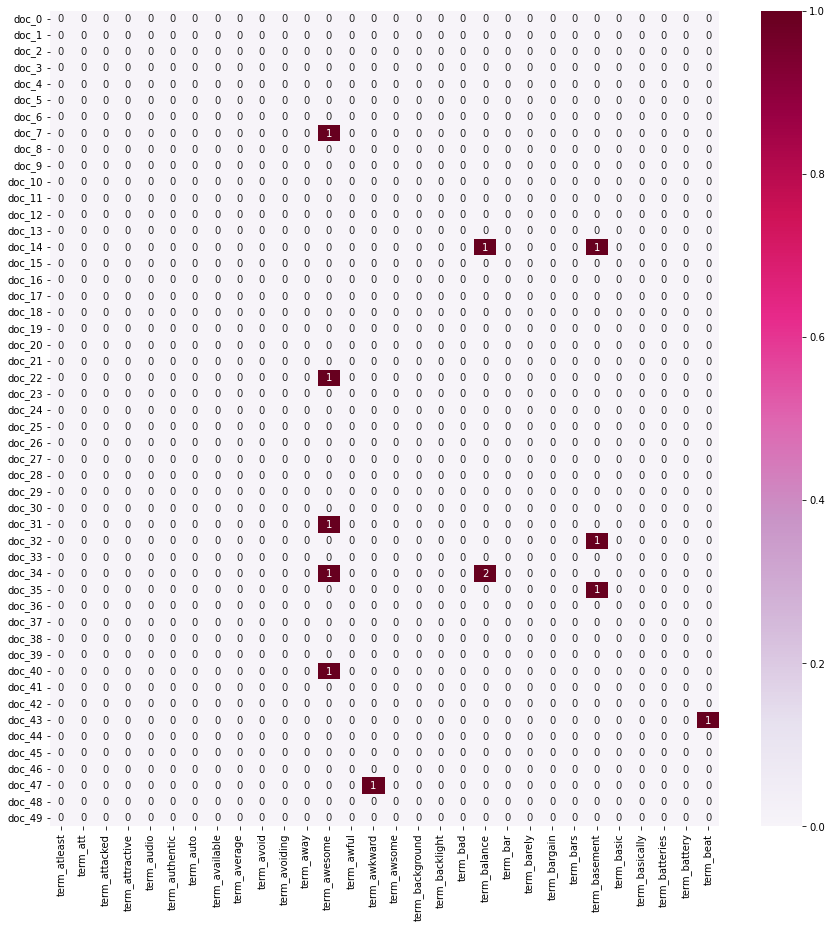

In [267]:
import seaborn as sns


plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[100:130]]
plot_y = ["doc_"+ str(i) for i in list(df_amazon.index)[0:50]]
plot_z = X_counts[0:50, 100:130].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
print ("skip the first 100 terms in get_feature_names because they are numbers and symbols, instead of letters.")

## Exercise_12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

(1000, 2)


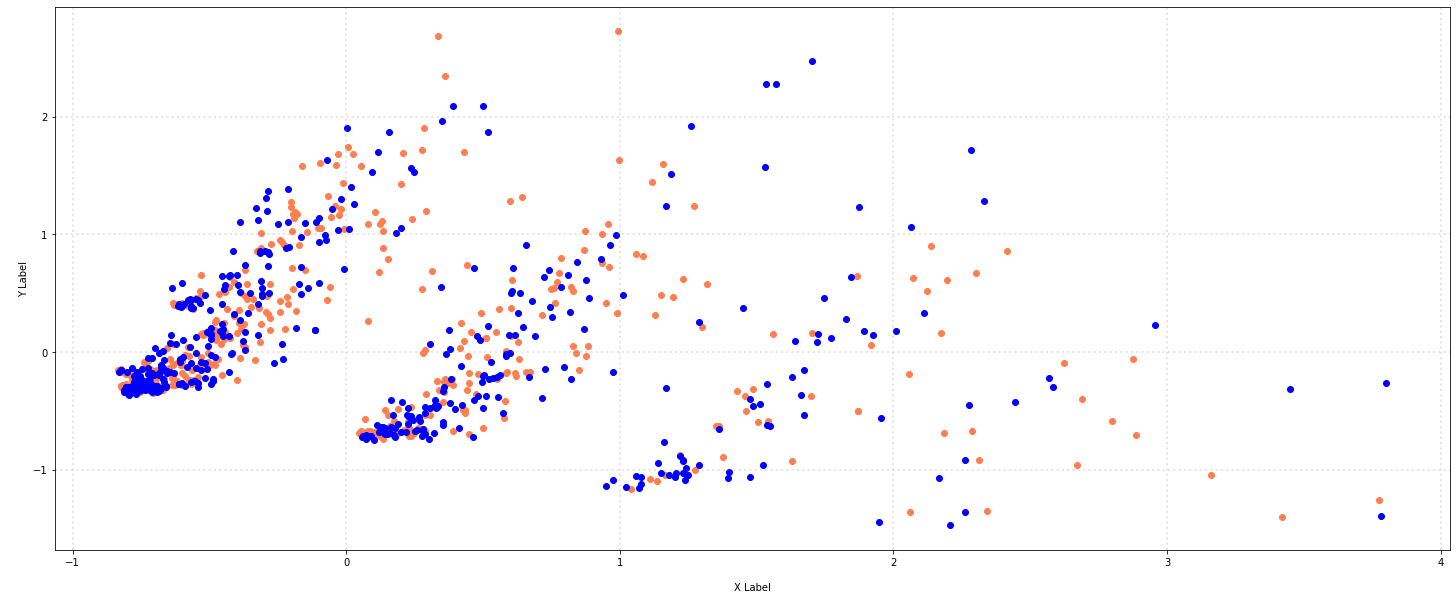

In [101]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print (X_reduced.shape)

for c, category in zip(col, categories):
    xs = X_reduced[df_amazon['category_name'] == category].T[0]
    ys = X_reduced[df_amazon['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(1000, 3)


'\nGiven the coordinations of points are represented as (x, y, z)\nAfter transfer points into 3-dimentions, I found:\n1. The x value of blue points are smaller relatively.\n2. The y value of black points are smaller relatively.\n3. The z value of coral points are bigger relatively.\n4. The x value of purple points are smaller than those of blue points overall.\n'

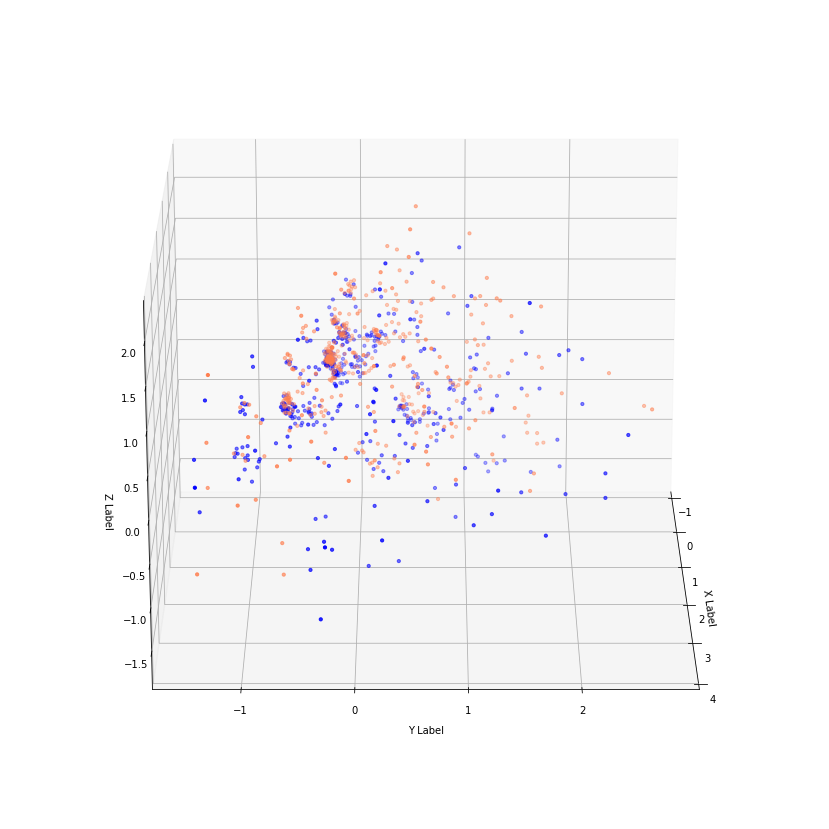

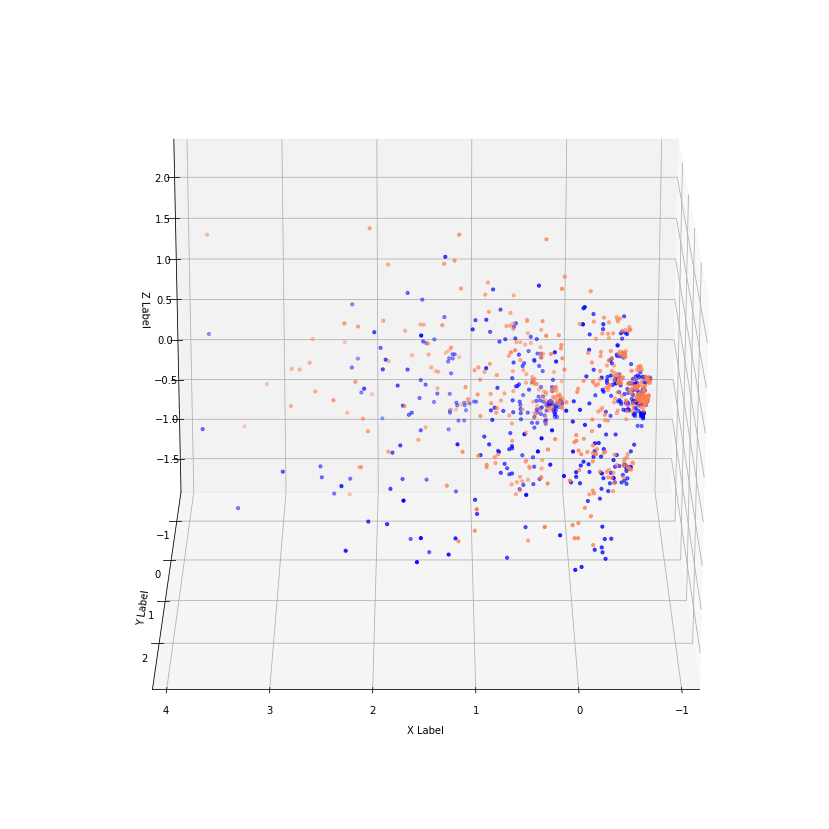

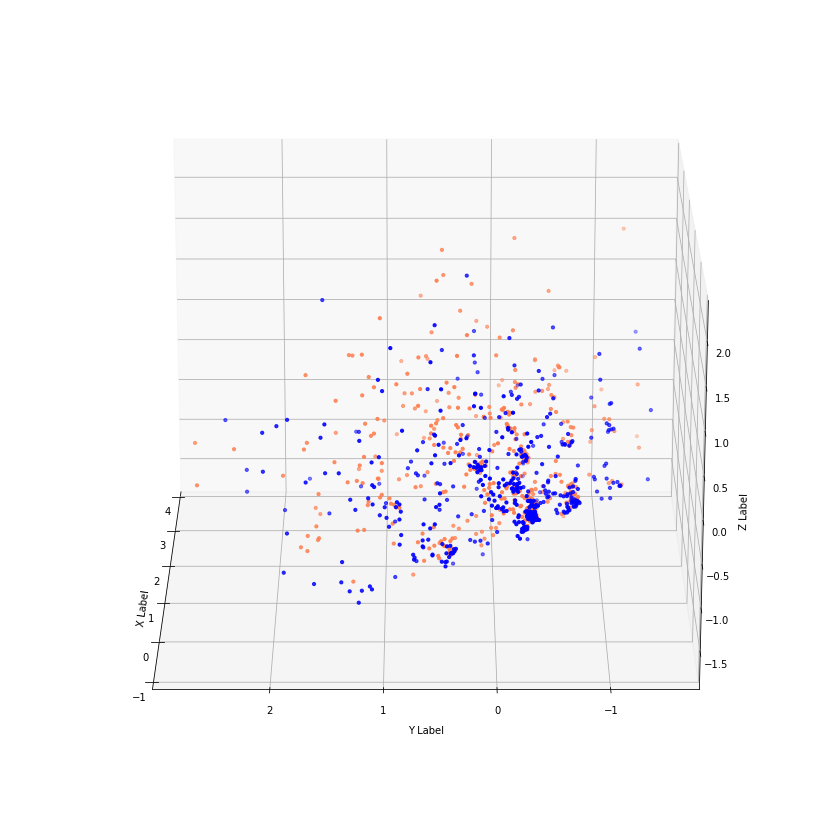

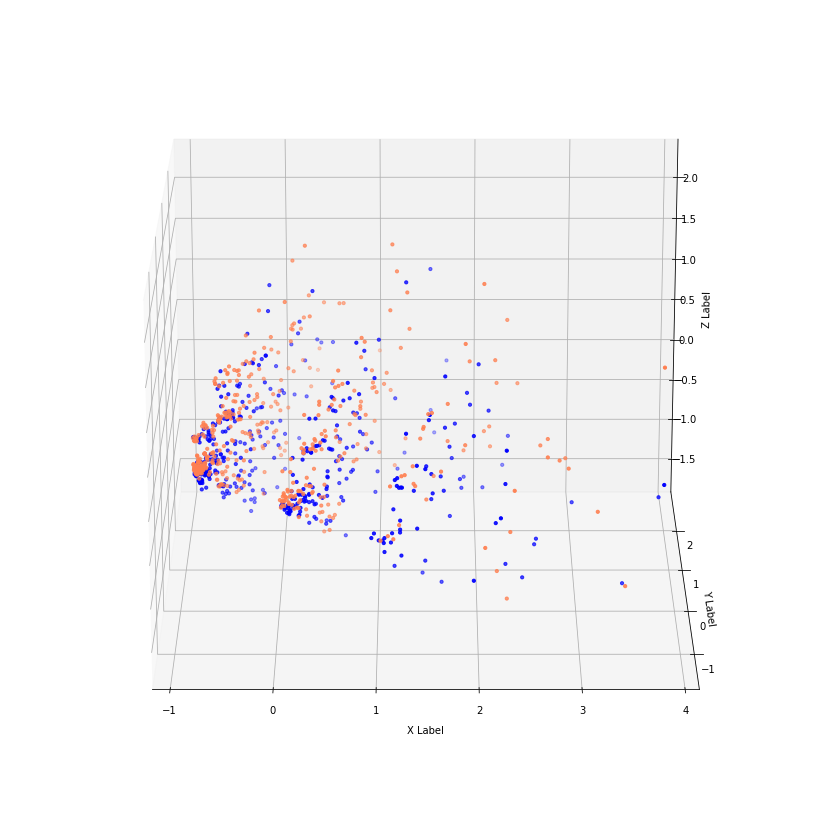

In [99]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print (X_reduced.shape)


def draw_space(ax):
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

fig_1 = plt.figure(figsize = (15,15))
fig_2 = plt.figure(figsize = (15,15))
fig_3 = plt.figure(figsize = (15,15))
fig_4 = plt.figure(figsize = (15,15))
# ax = Axes3D(fig)

ax_1 = fig_1.add_subplot(projection='3d')
ax_2 = fig_2.add_subplot(projection='3d')
ax_3 = fig_3.add_subplot(projection='3d')
ax_4 = fig_4.add_subplot(projection='3d')

ax_1.view_init(20, 0)
ax_2.view_init(20, 90)
ax_3.view_init(20, 180)
ax_4.view_init(20, 270)


col = ['coral', 'blue']
for c, category in zip(col, categories):
    xs = X_reduced[df_amazon['category_name'] == category].T[0]
    ys = X_reduced[df_amazon['category_name'] == category].T[1]
    zs = X_reduced[df_amazon['category_name'] == category].T[2]

    ax_1.scatter(xs, ys, zs, c = c, marker='o', s=10)
    ax_2.scatter(xs, ys, zs, c = c, marker='o', s=10)
    ax_3.scatter(xs, ys, zs, c = c, marker='o', s=10)
    ax_4.scatter(xs, ys, zs, c = c, marker='o', s=10)
    
    draw_space(ax_1)
    draw_space(ax_2)
    draw_space(ax_3)
    draw_space(ax_4)
    
    
########################################################################
#  what I found  

'''
Given the coordinations of points are represented as (x, y, z)
After transfer points into 3-dimentions, I found:
I could not tell the difference of positions of the two classes.
The potential reason I think is each documents are too short.
The original vectors are too sparse to be representative.
'''
########################################################################

## Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [105]:
# Answer here

import plotly.express as px


term_frequencies = []
for j in range(0,X_counts.shape[1]): # iterate thru terms
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]    
    
df = pd.DataFrame() 
df['term_name'] = count_vect.get_feature_names()[:300]
df['term_freq'] = term_frequencies[:300]
fig = px.bar(df, x='term_name', y='term_freq')

fig.update_layout(
    title = "Trem-Frequency",
    xaxis_title = "Terms",
    yaxis_title = "Frequency",
    legend_title = "Legend Title",
    font = dict(
        family = "Courier New, monospace",
        size = 2,
        color = "RebeccaPurple"
    )
)

fig.show()

/Users/lihsuanchin/Jupyter/Data_Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



## Exercise_14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Reduce the number of terms you want to visualize.

In [106]:
import plotly.express as px

print ("For the first 300 terms, only the terms with frequency greater than 3 are shown.")

df = pd.DataFrame() 
term_name = count_vect.get_feature_names()[:300]
term_freq = term_frequencies[:300]
term_name, term_freq = zip(*((tn, tf) for tn, tf in zip(term_name, term_freq) if tf>3))
df['term_name'] = term_name
df['term_freq'] = term_freq

fig = px.bar(df, x='term_name', y='term_freq')

fig.update_layout(
    title = "Trem-Frequency",
    xaxis_title = "X: Terms",
    yaxis_title = "Y: Frequency",
    legend_title = "Legend Title",
    font = dict(
        family = "Courier New, monospace",
        size = 15,
        color = "RebeccaPurple"
    )
)

fig.show()

For the first 300 terms, only the terms with frequency greater than 3 are shown.


## Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. 

In [107]:
import plotly.express as px

print (
'''
Only the first 500 trems are sorted and shown.
Possible reason that there's a chunk around the beginning:
1. The collection of terms is not big enough.
2. Preprocessing for the text has not done. Many terms consisting of punctuations and digits are included.
'''
)

df = pd.DataFrame() 
df['term_name'] = count_vect.get_feature_names_out()[:500]
df['term_freq'] = term_frequencies[:500]
df = df.sort_values('term_freq', ascending=False)
fig = px.bar(df, x='term_name', y='term_freq', color_discrete_sequence =['black']*len(df))

fig.update_layout(
    title = "Trem-Frequency",
    xaxis_title = "Terms",
    yaxis_title = "Frequency",
    legend_title = "Legend Title",
    font = dict(
        family = "Courier New, monospace",
        size = 1,
        color = "RebeccaPurple"
    )
)
fig.show()



Only the first 500 trems are sorted and shown.
Possible reason that there's a chunk around the beginning:
1. The collection of terms is not big enough.
2. Preprocessing for the text has not done. Many terms consisting of punctuations and digits are included.



## Exercise_16
Try to generate the binarization using the category_name column instead. Does it work?

In [110]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df_amazon.category_name)
print (mlb.classes_)
df_amazon['bin_category_name'] = mlb.transform(df_amazon['category_name']).tolist()
print (df_amazon['bin_category_name'])
print ("\n---------------Yes, it works!---------------")

['negative' 'positive']
0      [0]
1      [1]
2      [1]
3      [0]
4      [1]
      ... 
995    [0]
996    [0]
997    [0]
998    [0]
999    [0]
Name: bin_category_name, Length: 1000, dtype: object

---------------Yes, it works!---------------


# Data Visualization

# TF-IDF Features

In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import math
from sklearn.preprocessing import normalize


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_amazon.sentence)
print (X.shape)


vectorizer = TfidfVectorizer(stop_words= 'english')
tfidf = vectorizer.fit_transform(df_amazon.sentence)
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out(), index= list(range(0, 1000)) )
# for v, w in zip(df_tfidf.iloc[0] ,vectorizer.get_feature_names_out()):
#         print (v, w)

df_tfidf

(1000, 1847)


,10,100,11,12,13,15,15g,18,20,2000,...,wouldn,wow,wrong,wrongly,year,years,yell,yes,z500a,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes classifier

### documents represented by TF-IDF

In [257]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X = df_tfidf.values.tolist()
Y = df_amazon['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
score = bnb.score(X_test, Y_test)
print ('classification accuracy:', score)

classification accuracy: 0.836


### documents represented by term frequency

In [259]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words= 'english')
X = count_vect.fit_transform(df_amazon.sentence)
Y = df_amazon['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
score = bnb.score(X_test, Y_test)
print ('classification accuracy:', score)

classification accuracy: 0.764


In [235]:
# just to make sure the order of documents and their voectors syncs

for w, word in zip(X[2], vectorizer.get_feature_names()):
    if w !=0.0:
        print (w, word)

0.38588437172802004 for
0.4042788970415545 great
0.7933399057616529 jawbone
0.24137858022000805 the


### Comment on the difference of classification performance: TF-IDF vs. term_frequency

Although both tf-idf and term_frequency consider the term frequency within a document,<br>
terms with higher tf-idf value can be regarded as "more important".


Because tf-idf consider the inverse-document-frequency. <br>
Which means words appear in too many documents are not special, like stopwords eg. "the", "and" ... <br>
By considering the term importance in vector representation of documents, weights of important words become bigger.<br> 
Which make Naive Bayes easier to tell the difference and do classification.


Therefore, the accuracy for documents represented by TF-IDF (arond 0.84), <br>
is higher than that by term frequency (around 0.76).


# The inefficent parts you noticed? <br>How can you improve the Data preprocessing for these specific datasets?


1. There are so many meaningless terms in the term set, like "00", "000", "---"<br>
    **sol** : eliminate the terms with non-alphabet characters


2. Words with high inverse-document-frequency isn't so representative so it's helpless in classification tasks.<br>
    **sol** : eliminate stopwords

    
3. Same words with different case, tense are taken as different words. <br>Which makes the vectors of documents more sparse and not so representative.<br>
    **sol** : do stemming and lemmatization

    
4. Some documents has short lengths (fewer words). Which also makes the vectors of documents more sparse.<br>
    **sol** : don't consider short documents, by setting a threshold lengh
